In [2]:
import dateutil
import sys
import numpy as np
from scipy.spatial import ConvexHull
import pandas as pd 
import lxml.etree as etree
import sqlalchemy
import pymysql
from sqlalchemy import create_engine
from urllib.request import urlopen
import warnings
import datetime
warnings.filterwarnings('ignore')
from sqlalchemy.sql import text
import sys
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
import isoweek

import datetime as dt

import statsmodels.api as sm
from datetime import datetime
import scipy as sc
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,7
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})

# Sklearn
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics 

import itertools
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [60]:
# import the raw data
column_names = ['ID',
                'diagnosis',
                'radius_mean',
                'radius_sd_error',
                'radius_worst',
                'texture_mean',
                'texture_sd_error',
                'texture_worst',
                'perimeter_mean',
                'perimeter_sd_error',
                'perimeter_worst',
                'area_mean',
                'area_sd_error',
                'area_worst',
                'smoothness_mean',
                'smoothness_sd_error',
                'smoothness_worst',
                'compactness_mean',
                'compactness_sd_error',
                'compactness_worst',
                'concavity_mean',
                'concavity_sd_error',
                'concavity_worst',
                'concave_points_mean',
                'concave_points_sd_error',
                'concave_points_worst',
                'symmetry_mean',
                'symmetry_sd_error',
                'symmetry_worst',
                'fractal_dimension_mean',
                'fractal_dimension_sd_error',
                'fractal_dimension_worst']

file = 'breast_cancer.csv'

df_bc = pd.read_csv(file, encoding='latin', names=column_names)

In [61]:
# inspect dataframe

df_bc.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Exploratory Analysis

In [5]:
# gauge size

print("\n \t The dataframe has {0[0]} rows and {0[1]} columns. \n".format(df_bc.shape))
df_bc.info()


 	 The dataframe has 569 rows and 32 columns. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          569 non-null    int64  
 1   diagnosis                   569 non-null    object 
 2   radius_mean                 569 non-null    float64
 3   radius_sd_error             569 non-null    float64
 4   radius_worst                569 non-null    float64
 5   texture_mean                569 non-null    float64
 6   texture_sd_error            569 non-null    float64
 7   texture_worst               569 non-null    float64
 8   perimeter_mean              569 non-null    float64
 9   perimeter_sd_error          569 non-null    float64
 10  perimeter_worst             569 non-null    float64
 11  area_mean                   569 non-null    float64
 12  area_sd_error               569 non-null   

In [63]:
diagnosis_all = list(df_bc.shape)[0]
diagnosis_categories = list(df_bc['diagnosis'].value_counts())

print("\n \t The data has {} diagnosis, {} benign and {} malignant. Thus there is no class imbalance!".format(diagnosis_all, 
                                                                                 diagnosis_categories[0], 
                                                                                 diagnosis_categories[1]))


 	 The data has 569 diagnosis, 357 benign and 212 malignant. Thus there is no class imbalance!


## Using Seaborn library to visualise 'NaN' values


We'll be using a heatmap visualisation from the Seaborn library, a heatmap is a two-dimensional graphical representation of data where the individual values that are contained in a matrix are represented as colors.

Outcome: Dataset does not contain any null values

In [7]:
def visualise_null(data):
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(12,7))
    sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.xticks(range(len(data.columns)), data.columns, rotation=60)
    plt.show()

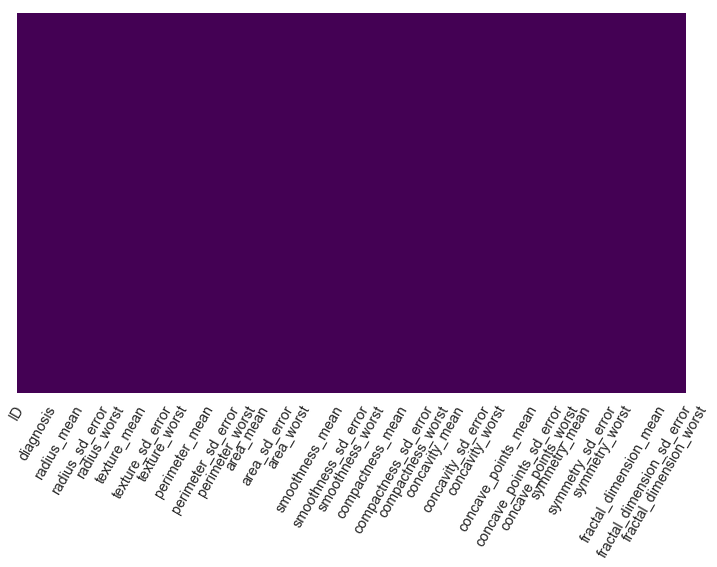

In [8]:
visualise_null(df_bc)

### What correlations are present in the data?

We'll use Seaborn's heatmap again and look into the features that end with mean to determine which features highly correlate with benign or malignant tumors.

In [9]:
df_mean = df_bc.loc[:, df_bc.columns.str.endswith("mean")]

mean_cols = list(df_mean.columns)

outcome_var = 'diagnosis'

#mean_cols.append(outcome_var)

print(mean_cols)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


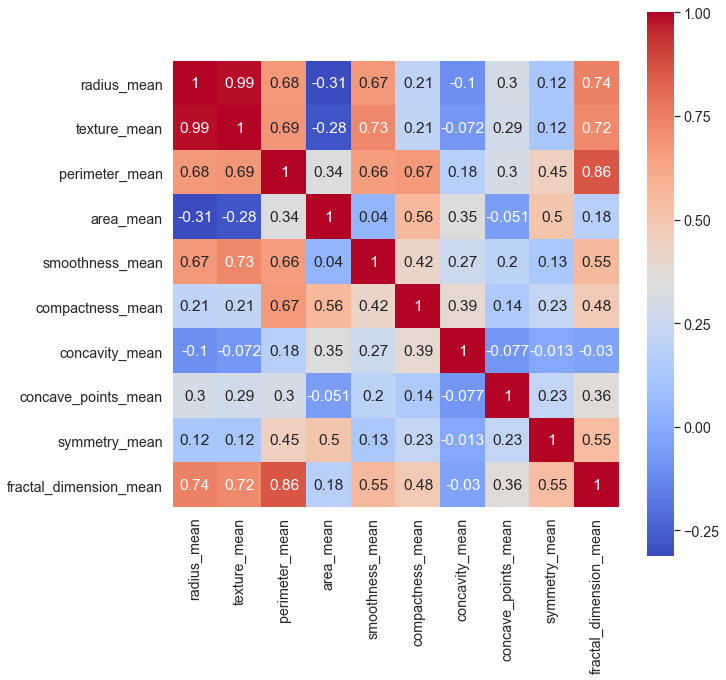

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df_bc[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                   'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 
                   'fractal_dimension_mean']].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

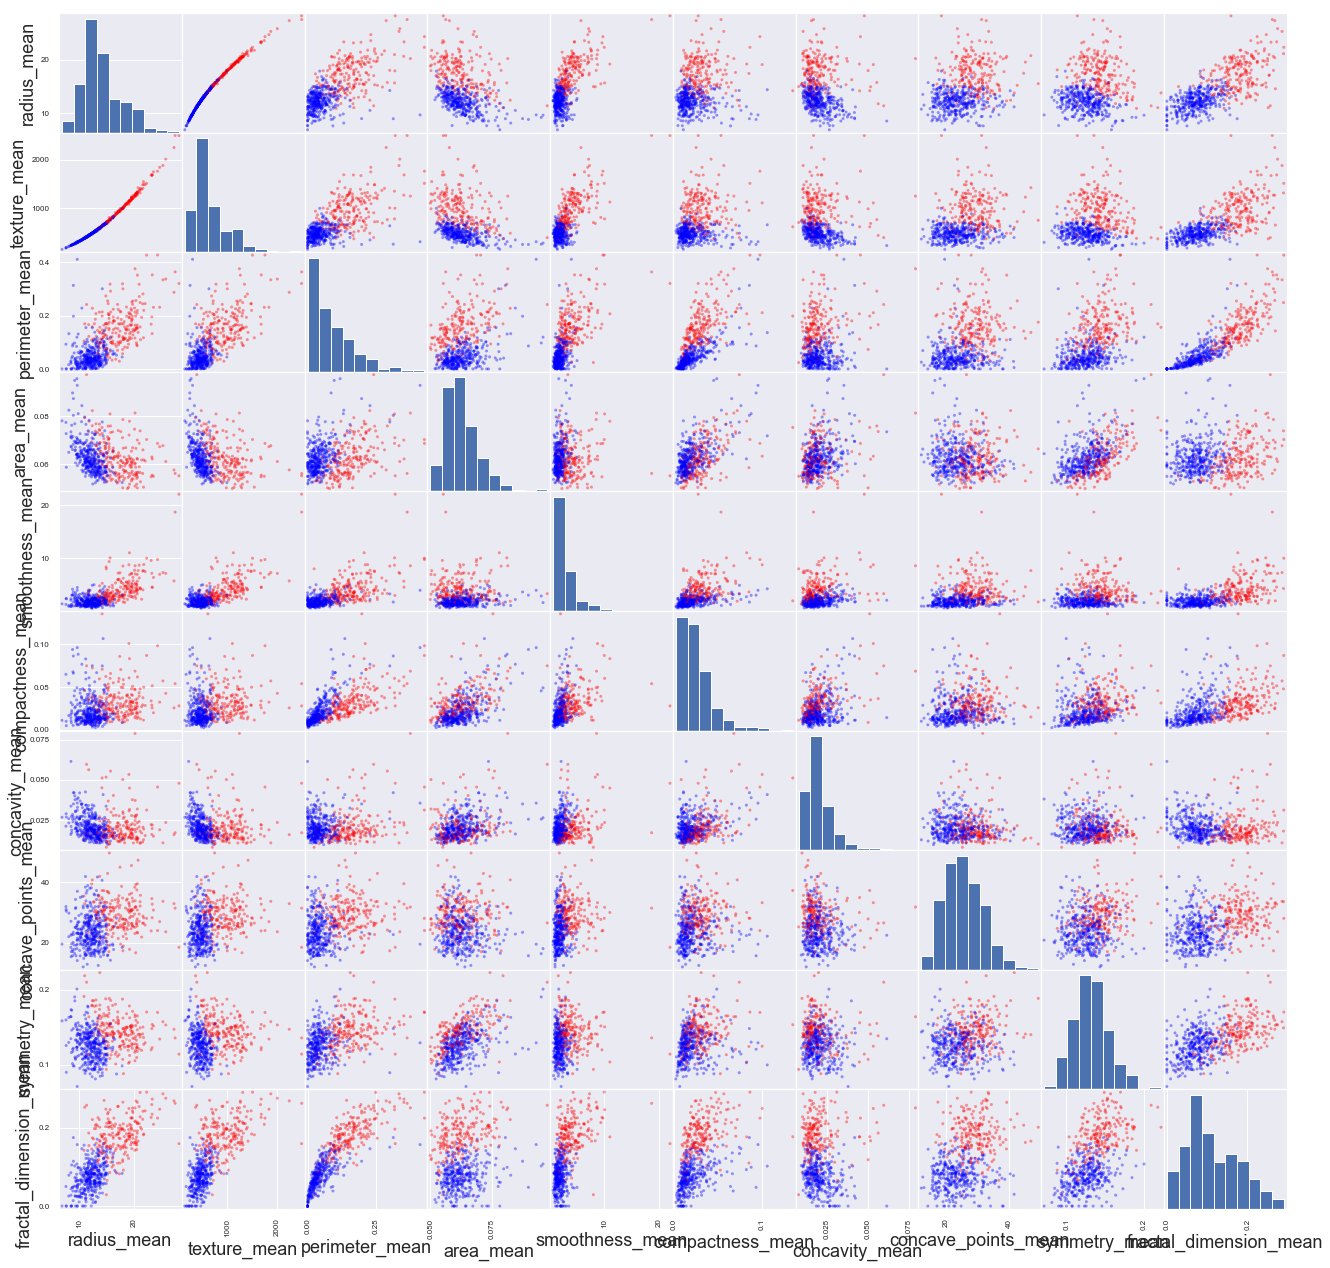

In [11]:
sns.set(font_scale=1.5)
color_dic = {'M':'red', 'B':'blue'}
colors = df_bc['diagnosis'].map(lambda x: color_dic.get(x))

sm = pd.plotting.scatter_matrix(df_bc[mean_cols], c=colors, alpha=0.4, figsize=((22,22)));

plt.show()

In [13]:
import ppscore as pps

pps.score(df_bc, "radius_mean", "diagnosis")

{'x': 'radius_mean',
 'y': 'diagnosis',
 'ppscore': 0.6229627675068017,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.5149384885764499,
 'model_score': 0.8171137501438968,
 'model': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best')}

In [32]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                   'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 
                   'fractal_dimension_mean']

In [19]:
pps.matrix(df_bc[cols])

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,diagnosis,diagnosis,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,diagnosis,radius_mean,0.303099,regression,True,mean absolute error,2.665731,1.857751,"DecisionTreeRegressor(criterion='mse', max_dep..."
2,diagnosis,texture_mean,0.293470,regression,True,mean absolute error,246.513533,174.169267,"DecisionTreeRegressor(criterion='mse', max_dep..."
3,diagnosis,perimeter_mean,0.337119,regression,True,mean absolute error,0.059447,0.039406,"DecisionTreeRegressor(criterion='mse', max_dep..."
4,diagnosis,area_mean,0.000000,regression,True,mean absolute error,0.005206,0.005343,"DecisionTreeRegressor(criterion='mse', max_dep..."
...,...,...,...,...,...,...,...,...,...
116,fractal_dimension_mean,compactness_mean,0.000000,regression,True,mean absolute error,0.012498,0.015601,"DecisionTreeRegressor(criterion='mse', max_dep..."
117,fractal_dimension_mean,concavity_mean,0.000000,regression,True,mean absolute error,0.005561,0.007571,"DecisionTreeRegressor(criterion='mse', max_dep..."
118,fractal_dimension_mean,concave_points_mean,0.000000,regression,True,mean absolute error,4.902689,6.263565,"DecisionTreeRegressor(criterion='mse', max_dep..."
119,fractal_dimension_mean,symmetry_mean,0.000000,regression,True,mean absolute error,0.017935,0.021372,"DecisionTreeRegressor(criterion='mse', max_dep..."


In [39]:
# top 10 predictors
predictors_10 = predictors_df.head(10)

Text(0.5, 0.98, 'Most Predictive Features of Diagnosis Status')

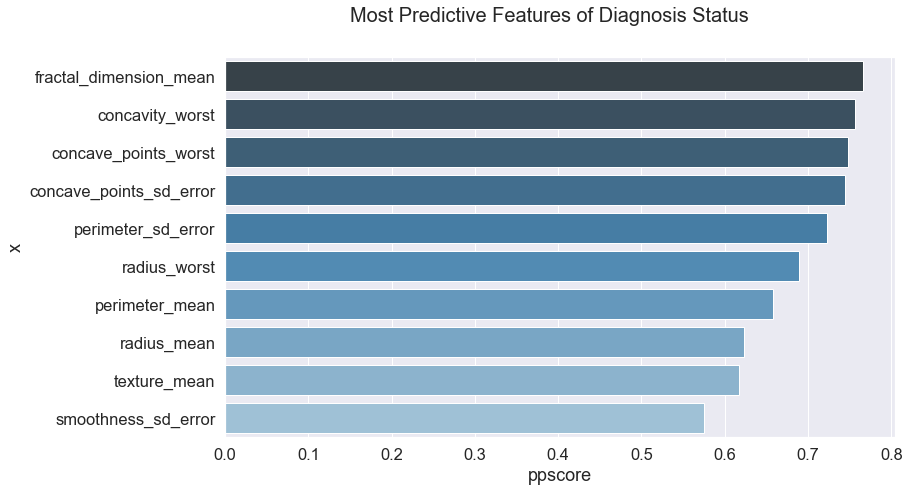

In [46]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(12, 7), sharex=False)

sns.barplot(data=predictors_10, x="ppscore", y="x", palette="Blues_d")
fig.suptitle('Most Predictive Features of Diagnosis Status', fontsize=20)

### Display the relationship visually and write 1-2 sentences explaining the relationship.

As can be seen from above visualisations, the red and blues dots occupy different regions of the plots, particularly in the scatter matrix plot. This indicates that the features indicate that the two categories are markedly different. It seems there is an exponential relationship between radius and fractal_dimension. Since area = π(radius)² & perimeter = 2π(radius), particularly for those features (fractal dimension, radius, and perimeter do we observe a direct relationship with malignant status in the diagnosis. The means of those features are clearly higher.

And although you cannot interpret the predictive power scores which I have plotted above as easily as correlation coefficients, we can see that there are a strong patterns in the features which have an explanatory interpretation. 

# Modeling

Build a model to predict the malignant tumors.

Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.

Identify how you would control for overfitting in each classification technique.

Evaluate the performance of each model.

In each model, identify the most important predictive variables and explain how you identified them.

In [47]:
print(list(df_bc.diagnosis.unique()))

['M', 'B']


In [51]:
def diagnosis_status(data):
    if isinstance(data, pd.DataFrame):
        onehotd = {"B":0, "M":1}
        data['diagnosis'] = data['diagnosis'].map(onehotd)
        return data
    else:
        TypeError("Required dataframe type")

In [52]:
df_ml = diagnosis_status(df_bc)
df_ml.shape

(569, 32)

In [53]:
df_ml.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Earlier we found that the data has 569 diagnosis, 357 benign and 212 malignant. Thus there is no class imbalance!

B    357
M    212
Name: diagnosis, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

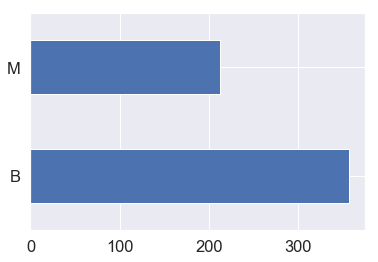

In [62]:
df_bc['diagnosis'].value_counts().plot(kind='barh')
print(df_bc['diagnosis'].value_counts())
plt.show

0    357
1    212
Name: diagnosis, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

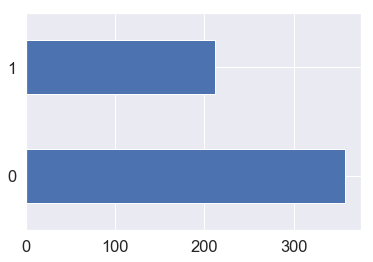

In [58]:
df_ml['diagnosis'].value_counts().plot(kind='barh')
print(df_ml['diagnosis'].value_counts())
plt.show

Before and After feature scaling
We'll apply feature scaling, using 'MinMaxScaler' from sckit-learn library. Which scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.

We'll plot before and after applying feature scaling.

In [64]:
up_to_date = df_ml.copy()

In [69]:
def before_scale(data):
    sns.set(font_scale=1.2)
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (15,7))
    ax1.set_title("Before Scaling")
    for col in data.columns:
        sns.kdeplot(data[col], ax=ax1)
        
    
    ax2.set_title("After Scaling")
    scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
    scaled_df = scaler.fit_transform(data)
    scaled_df = pd.DataFrame(scaled_df, columns=data.columns)
    for col2 in data.columns:
        sns.kdeplot(scaled_df[col2], ax = ax2)
        
    # Put the legend out of the figure
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

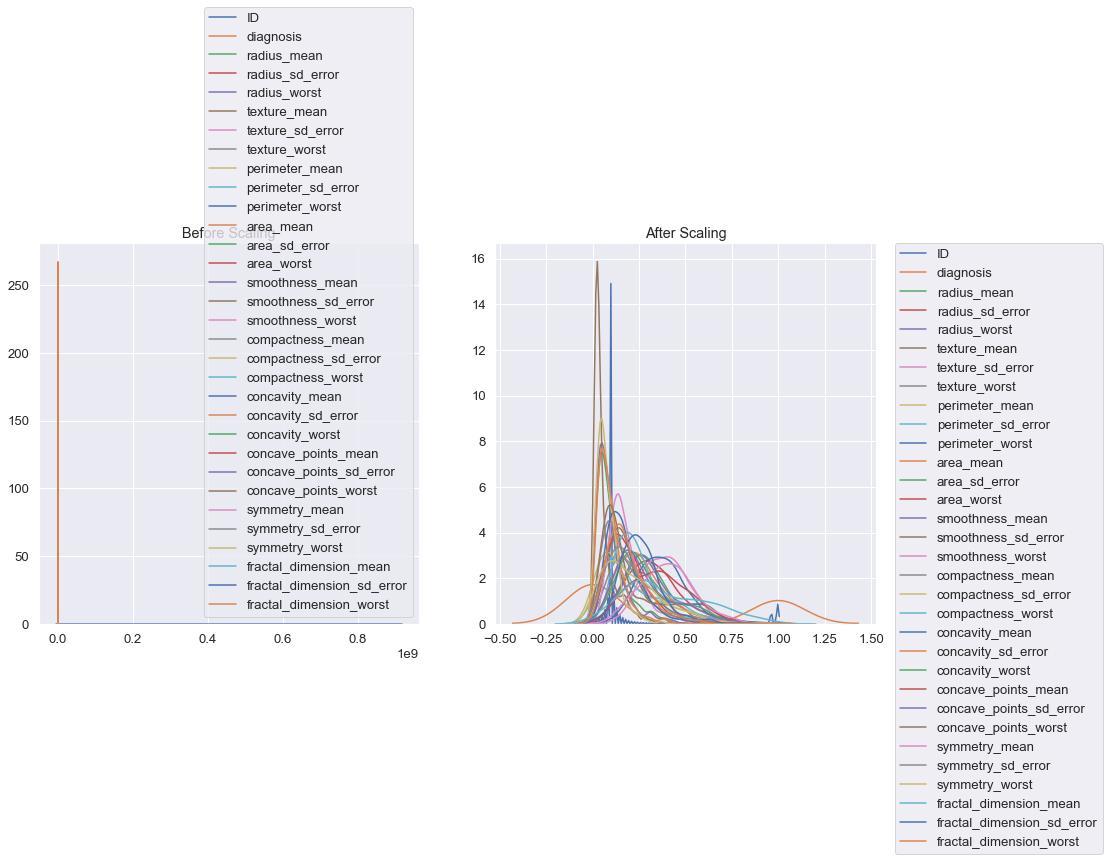

In [70]:
before_scale(up_to_date)

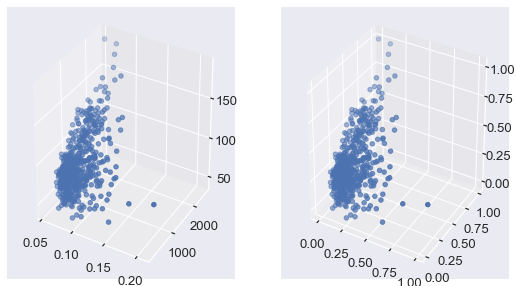

In [89]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')
ax1.scatter(df_bc['fractal_dimension_worst'], df_bc['texture_mean'], df_bc['radius_worst'])
ax2.scatter(scaled_df['fractal_dimension_worst'], scaled_df['texture_mean'], scaled_df['radius_worst'])
plt.show()

### Commentary

We can see that the features are a lot more comparable after scaling, varying from values around 0 to values over 1000, which will certainly improve model performance.

In [72]:
scaler = preprocessing.MinMaxScaler(feature_range = (0,1))
scaled_df = scaler.fit_transform(df_ml)
scaled_df = pd.DataFrame(scaled_df, columns=df_ml.columns)

In [74]:
scaled_df = scaled_df.drop('ID', axis=1)

In [77]:
scaled_df['diagnosis'] = scaled_df['diagnosis'].astype(int)

In [78]:
scaled_df.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## Model 1 - KNN

KNN (K-Nearest Neighbor) is a simple yet powerful supervised classification algorithm we can use to assign a class to new data point. It can be used for regression as well, KNN does not make any assumptions on the data distribution, hence it is non-parametric. It keeps all the training data to make future predictions by computing the similarity between an input sample and each training instance.

In [119]:
def plot_roc(truth, pred, title):
    sns.set(font_scale=1.2)
    fig, ax = plt.subplots(ncols=1, figsize= (15,7))
    fpr, tpr, _ = metrics.roc_curve(truth, pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, lw = lw, label = title + " (AUC = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], color = 'slateblue', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')

In [94]:
def plot_c_matrix(model, normalize=False):
    c_matrix = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Benign", "Malignant"]
    cmap = plt.cm.cool
    title = "Confusion Matrix"
    if normalize:
        c_matrix = c_matrix.astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]
        c_matrix = np.around(c_matrix, decimals=3)
        
    plt.imshow(c_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = c_matrix.max() / 2.0
    
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        plt.text(j, i, c_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if c_matrix[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [91]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df.iloc[:, :-1], scaled_df.iloc[:, -1], 
                                                    test_size = .3, random_state = 42)
print(">>>> X_train size: {}".format(X_train.shape))
print(">>>> X_test size: {}".format(X_test.shape))
print()
print(">>>> y_train size: {}".format(y_train.shape))
print(">>>> st size: {}".format(y_test.shape))

>>>> X_train size: (398, 30)
>>>> X_test size: (171, 30)

>>>> y_train size: (398,)
>>>> st size: (171,)


[[145   3]
 [  5  75]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       148
           1       0.96      0.94      0.95        80

   micro avg       0.96      0.96      0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228

KNN Accuracy is:  0.9649122807017544


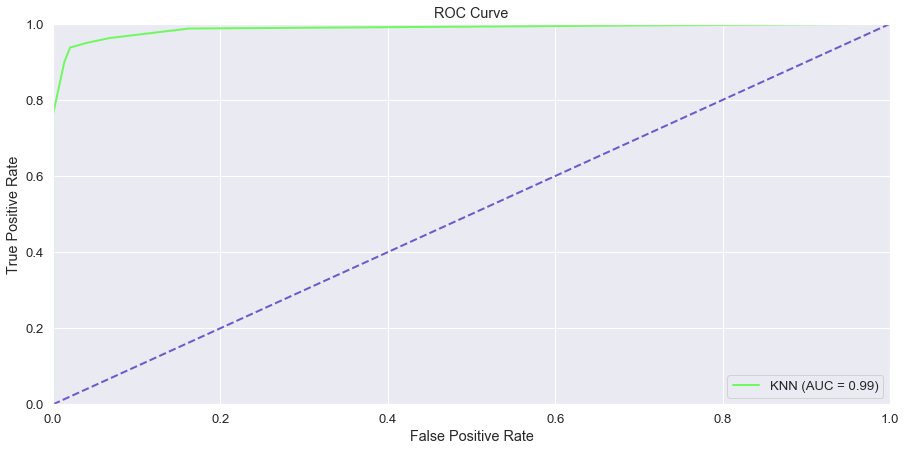

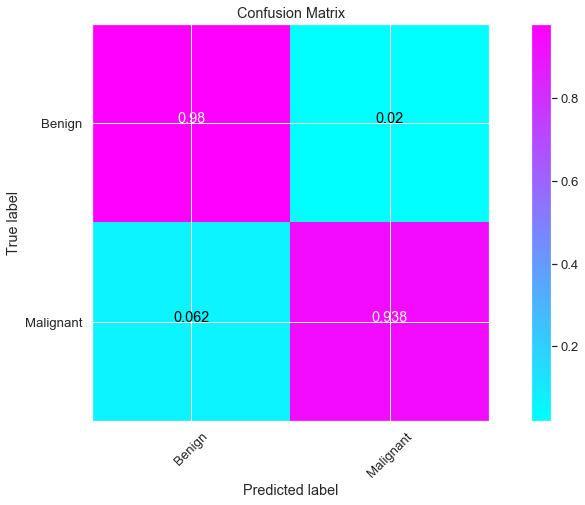

In [120]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = scaled_df.drop('diagnosis', axis=1).values
y = scaled_df['diagnosis'].values

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


knn_pred = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)[:,1]
knn_acc = accuracy_score(y_test, knn_pred)

print("KNN Accuracy is: ", knn_acc)
plot_roc(y_test, knn_proba, 'KNN')
plt.show()
plt.figure(figsize = (12,7))

plot_c_matrix(knn_pred, normalize = True)
plt.show()

### Commentary on KNN

We get a high performing model with excellent results on both true positives and true negatives. Using a K value of 6 our model accuracy is remarkably high, 96.6%.

In general the Training accuracy rises as the model complexity increases, for KNN the model complexity is determined by the value of K. Larger K value leads to smoother decision boundary (less complex model). 

Smaller K leads to more complex model (may lead to overfitting). Testing accuracy penalizes models that are too complex(over fitting) or not complex enough(underfit). 

In our case it seems that our model tends to overfit, suggesting we need to reduce our K value to something closer to 2-3 than >5. 



Advantages of KNN

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc.

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

4. Sensitive to noisy data, missing values and outliers: KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

## Multi-Layer PC - Perceptron Classifier

The most common neural network model is the multilayer perceptron (MLP). This type of neural
network is known as a supervised network because it requires a desired output in order to learn. The goal of this
type of network is to create a model that correctly maps the input to the output using historical data.

We'll apply multi-layer perceptron (MLP) algorithm that trains using backpropagation. This model optimizes the log-loss function using 'lbfgs':

solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
The solver for weight optimization.

‘lbfgs’ is an optimizer in the family of quasi-Newton methods.

‘sgd’ refers to stochastic gradient descent.

‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

Multi-Layer Perceptron Classifier Score:  0.9298245614035088


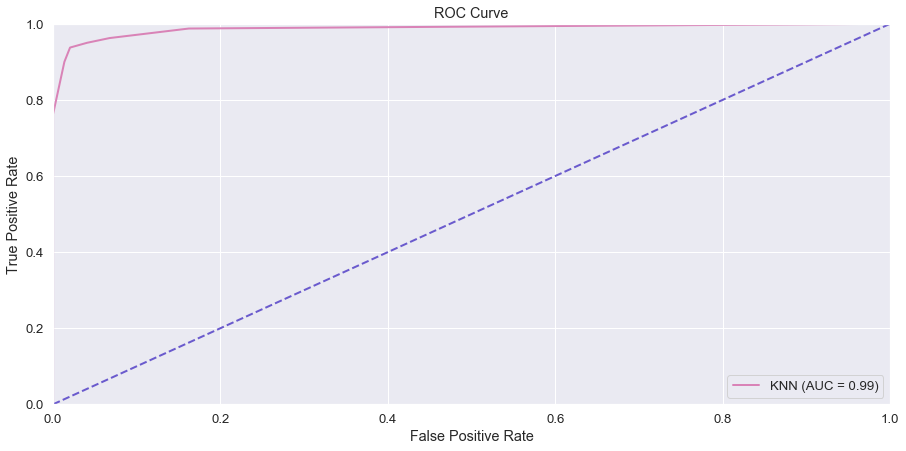

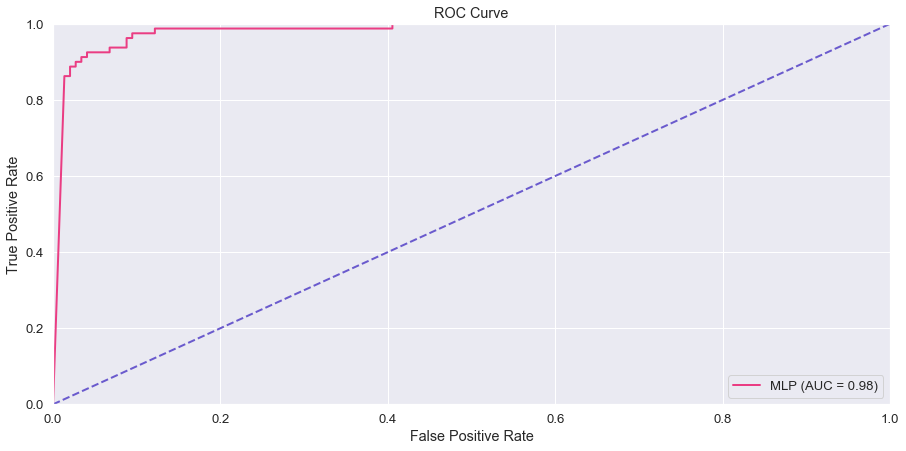

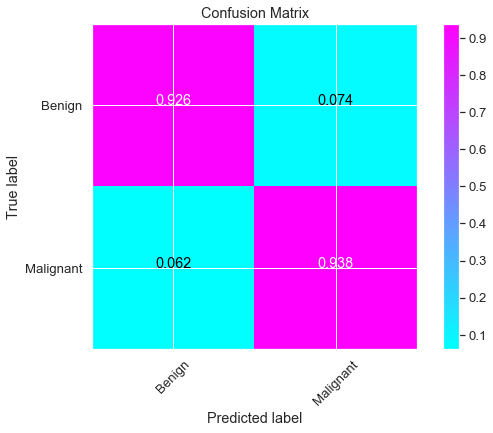

In [121]:
model_ml = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes = (5,3), random_state = 42)
model_ml.fit(X_train, y_train)
pred_ml = model_ml.predict(X_test)
pred_ml_proba = model_ml.predict_proba(X_test)[:,1]
acc_ml = accuracy_score(y_test, pred_ml)
print("Multi-Layer Perceptron Classifier Score: ", acc_ml)

plot_roc(y_test, knn_proba, 'KNN')
plot_roc(y_test, pred_ml_proba, 'MLP')
plt.show()

plt.figure(figsize = (8,6))
plot_c_matrix(pred_ml, normalize = True)
plt.show()

### Commentary

The MLP classification algorithm seemed to be less performant than our KNN model, with a predictive accuracy of 92%.

It is, however, important to know that we intentionally set a very high K value of 6, which may mean that our KNN approach suffered from overfitting, possibly less accurate on unseen data.

Comparitively, we would be very safe to assume that the MLP would outperform KNN in a production environment, since we managed to achieve 92% without much hyperparameter tuning.

### Pros and Cons of using MLP classifiers

**Benefits of Multilayer Perceptron**
1. Connectionist: used as a metaphor for biological neural networks
2. Computationally efficient: Can easily be parallelized
3. Universal computing machines
4. Adaptive learning: An ability to learn how to do tasks based on the data given for training or initial experience.
2. One of the preferred techniques for gesture recognition.
3. They yield the required decision function directly via training.
4. A two layer backpropagation network with sufficient hidden nodes has been proven to be a universal
approximator.

**Drawbacks**
1. Convergence can be slow
2. Local minima can affect the training process
3. Hard to scale


## Explanation

**To Technical Audiences**

Explain the limitations of your analysis and identify possible further steps you could take.

In this analysis I have explored machine learning techniques aimed at supervised classification, using two very popular algorithms in order to predict breast cancer cell types categorised as benign or malignant.

In a first step I have selected KNN as a simples initial analysis stage to determine whether our features were highly predictive in determining breast cell types. I have intentionally selected one of the most simplest classification algorithms to contrast it with the more advanced neural network based approaches, the MLP.  

The KNN model outperformed the MLP model for which we have selected a very high value for K (6). In the real world the most common K value is usually around 3 this means that we have intentionally explored the possibility of overfitting.  The KNN model outperformed the MLP one by almost 5%.  

This analysis is to some extent affected by limitations which must be noted. First of all, the data set was very small, only a few hundred rows. It is known in the scientific community that KNN usually finds it harder to perform well on large datasets. The opposite is true for our MLP approach.

The most promising way to enrich and enhance this analysis would be to improve on the area of feature engineering which would require some domain expertise. 

With regards to the second model, the MLP neural network approach could be improved by parameter tuning. 

Another point worth noting is that this analysis would've also been enriched by bootstrap sampling.

**To Non-Technical Audiences**

Write a short summary of your analysis, explaining how your model works and how it performs.
Briefly explain the factors that contributed to malignant vs benign tumor identification.

K-Nearest Neighbors (KNN): KNN is a powerful classification algorithm that is conceptually intuitive. It is exactly the type of model that a 4-year-old might design, despite having never taken a math class.

It helps the process of categorising data points as belonging to groups that share similarities. 

Thus the model aims to find common values, near to one another (hence why it is called K nearest neighbor), for all the variables that might explain our outcome category.

I have used this modelling approach to identify what patients who suffer from malignant cells have in common, so as to be able to predict it.

In a second model, which belongs to the category of neural networks, I have tried to achieve this identification of clusters of similarity by using models that are biologically inspired. 

Neural nets are biologically inspired models, wherein collections of interconnected “neurons” (often called units or nodes) work together to transform input data to output data. Each node applies a simple mathematical transformation to the data it receives; it then passes its result to the other nodes in its path.

Just as our brain contains billions of biological neurons, neural nets typically contain thousands or millions of these artificial neurons.

Each connection between nodes represents a different parameter to the model. This means, of course, that neural nets with millions of nodes have potentially billions of parameters associated with them.

A common criticism of neural nets is that they are too difficult to interpret — that it’s too hard to understand “what’s going on” inside of them. This criticism springs from the fact that neural nets simply have too many parameters, most or all of which are determined via complex combinations of mathematical transformations to the training data. While a simple linear regression has just two parameters (m and b), a neural network can have infinitely more, and it can be hard to figure out how they were calculated.

# Part 2

**Student Sample 1**

1) The student imported the dataframe using a directory path in the read_csv call. 

- this will throw an error if the folder does not exist, or the file is not in that folder.
- it is better to first define an absolute path using the library os.

2) The name of the data frame d is ambigious, it is always better to use an intuitive naming.

3) The prediction split between x and Y is not correct.

- x1 refers to a data frame object called data which is not defined (user defined d).

- x1 is also referencing the outcome variable (which should be y).

- x2 is not good in terms of naming convention, as the outcome is usually defined as y.

- even though Sklearn updates make the usage of .values not mandatory anymore it is better to use it for readability.

- the usage of pd.get_dummies in this context is not right.

- the call turns user specified columns from a data frame object into 0 or 1 boolean columns.

- e.g., df_dummy = pd.get_dummies(data=df, columns=['Year', 'Month', 'Weekday'])

- the user here is trying to predict multiple dummies, which is incorrect.

- the usage of cross_val_score in this context is not right.

- because of the x1 and x2 and the lack of an outcome variable.

- the user has also imported the cross_val_score twice.

- it is better to wrap the scores around a np.mean() call.

- the user has not used the train_test_split.

**Student Sample 2**

1) Student two is more consistent in the naming of variables.

2) The pd.get_dummies call is not correct as above, thus X is not an array of features.

3) It is better to wrap the scores around a np.mean() call.

4) The absolute directory path comment applies to this student as well.